In [6]:
#Import libraries

import urllib.request
import json
from pprint import pprint
import pandas as pd
import config
import datetime

In [7]:
#Get current timestamp
curTime = (datetime.datetime.now() + datetime.timedelta(hours=5)- datetime.timedelta(minutes=15)).strftime('%Y-%m-%d %H:%M:%S')
print(curTime)
prevTime = (datetime.datetime.now() + datetime.timedelta(hours=5) - datetime.timedelta(minutes=20)).strftime('%Y-%m-%d %H:%M:%S')
print(prevTime)

2020-11-13 18:10:10
2020-11-13 18:05:10


In [5]:
#Specify values

url = "https://webservice.hobolink.com/restv2/data/json"

values = {
  "action": "",
  "authentication": {
    "password": config.password,
    "token": config.token,
    "user": config.username
  },
  "query": {
    "end_date_time": curTime,
    "loggers": [20777720,20699245,1],
    "start_date_time": prevTime
  }
}


headers = {
    "Content-Type": "application/json",
    "Accept": "application/json",
}

NameError: name 'config' is not defined

In [25]:
#Get data

data = json.dumps(values).encode("utf-8")
#pprint(data)

try:
    req = urllib.request.Request(url, data, headers)
    with urllib.request.urlopen(req) as f:
        res = f.read()
    #pprint(res.decode())
except Exception as e:
    pprint(e)

In [26]:
#Convert response to a pandas dataframe

data = json.loads(res.decode())
df = pd.json_normalize(data['observationList'])
#df.to_csv("data.csv")

In [27]:
#Temperature air North
df.loc[df['sensor_sn'] == "20777735-1"]

#Temperature air South
df.loc[df['sensor_sn'] == "20692768-1"]

,logger_sn,sensor_sn,channel_num,timestamp,data_type,si_value,si_unit,us_value,us_unit,scaled_value,scaled_unit
99,20699245,20692768-1,12,2020-11-11 16:55:00Z,1,19.484015,°C,67.071226,°F,0.0,None


In [20]:
row = df.loc[df['sensor_sn'] == "20777735-1"]
value = row.iloc[0]['si_value']
type(float(value))

float

In [21]:
#Temperature soil North
df.loc[df['sensor_sn'] == "20770089-1"]

#Temperature soil South
df.loc[df['sensor_sn'] == "20684342-1"]

,logger_sn,sensor_sn,channel_num,timestamp,data_type,si_value,si_unit,us_value,us_unit,scaled_value,scaled_unit
1,20699245,20684342-1,11,2020-11-11 16:45:00Z,1,12.991962,°C,55.385531,°F,0.0,None


In [9]:
import datetime
#Get last 12 hours
curTime = (datetime.datetime.now() + datetime.timedelta(hours=5)- datetime.timedelta(minutes=15)).strftime('%Y-%m-%d %H:%M:%S')
print(curTime)
prevTime = (datetime.datetime.now() + datetime.timedelta(hours=5) - datetime.timedelta(minutes=15) - datetime.timedelta(hours=12)).strftime('%Y-%m-%d %H:%M:%S')
print(prevTime)

2020-11-13 18:10:30
2020-11-13 06:10:30


In [10]:
#Specify values

url = "https://webservice.hobolink.com/restv2/data/json"

values = {
  "action": "",
  "authentication": {
    "password": config.password,
    "token": config.token,
    "user": config.username
  },
  "query": {
    "end_date_time": curTime,
    "loggers": [20777720,20699245,1],
    "start_date_time": prevTime
  }
}


headers = {
    "Content-Type": "application/json",
    "Accept": "application/json",
}

In [11]:
#Get data

data = json.dumps(values).encode("utf-8")
#pprint(data)

try:
    req = urllib.request.Request(url, data, headers)
    with urllib.request.urlopen(req) as f:
        res = f.read()
    #pprint(res.decode())
except Exception as e:
    pprint(e)

In [12]:
#Convert response to a pandas dataframe

data = json.loads(res.decode())
df = pd.json_normalize(data['observationList'])
#df.to_csv("data.csv")

In [38]:
#Temperature air North
tempN12 = df.loc[df['sensor_sn'] == "20777735-1"]
tempN12 = tempN12[['timestamp','us_value']]
tempN12 = tempN12.rename(columns={"us_value": "North"})
tempN12

,timestamp,North
2,2020-11-13 06:15:00Z,41.183502
155,2020-11-13 06:20:00Z,41.137049
308,2020-11-13 06:25:00Z,41.183502
461,2020-11-13 06:30:00Z,41.322771
614,2020-11-13 06:35:00Z,41.369165
...,...,...
21272,2020-11-13 17:50:00Z,40.858019
21425,2020-11-13 17:55:00Z,40.438452
21578,2020-11-13 18:00:00Z,40.531796
21731,2020-11-13 18:05:00Z,40.345046


In [39]:
#Temperature air South
tempS12 = df.loc[df['sensor_sn'] == "20692768-1"]
tempS12 = tempS12[['timestamp','us_value']]
tempS12 = tempS12.rename(columns={"us_value": "South"})
tempS12

,timestamp,South
97,2020-11-13 06:15:00Z,41.600915
250,2020-11-13 06:20:00Z,41.600915
403,2020-11-13 06:25:00Z,41.647221
556,2020-11-13 06:30:00Z,41.739791
709,2020-11-13 06:35:00Z,41.786054
...,...,...
21361,2020-11-13 17:50:00Z,40.625079
21514,2020-11-13 17:55:00Z,40.531796
21667,2020-11-13 18:00:00Z,40.578445
21820,2020-11-13 18:05:00Z,40.625079


Text(0, 0.5, 'Temperature')

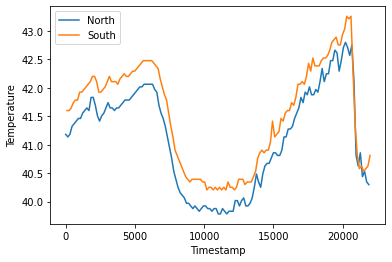

In [40]:
ax = tempN12.plot()
tempS12.plot(ax=ax)
ax.set_xlabel("Timestamp")
ax.set_ylabel("Temperature")